In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
# move column 'Transported' to the first position
first_col = train.pop('Transported')
train.insert(0, 'Transported', first_col)
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Transported   8693 non-null   bool   
 1   PassengerId   8693 non-null   object 
 2   HomePlanet    8492 non-null   object 
 3   CryoSleep     8476 non-null   object 
 4   Cabin         8494 non-null   object 
 5   Destination   8511 non-null   object 
 6   Age           8514 non-null   float64
 7   VIP           8490 non-null   object 
 8   RoomService   8512 non-null   float64
 9   FoodCourt     8510 non-null   float64
 10  ShoppingMall  8485 non-null   float64
 11  Spa           8510 non-null   float64
 12  VRDeck        8505 non-null   float64
 13  Name          8493 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Co

In [3]:
print(train.isna().sum()/train.shape[0], end='\n')
print('x'*20)
print(test.isna().sum()/test.shape[0])

Transported     0.000000
PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
dtype: float64
xxxxxxxxxxxxxxxxxxxx
PassengerId     0.000000
HomePlanet      0.020341
CryoSleep       0.021744
Cabin           0.023381
Destination     0.021510
Age             0.021277
VIP             0.021744
RoomService     0.019172
FoodCourt       0.024784
ShoppingMall    0.022913
Spa             0.023615
VRDeck          0.018705
Name            0.021978
dtype: float64


In [4]:
from pandas_profiling import ProfileReport
import missingno as msno

<AxesSubplot:>

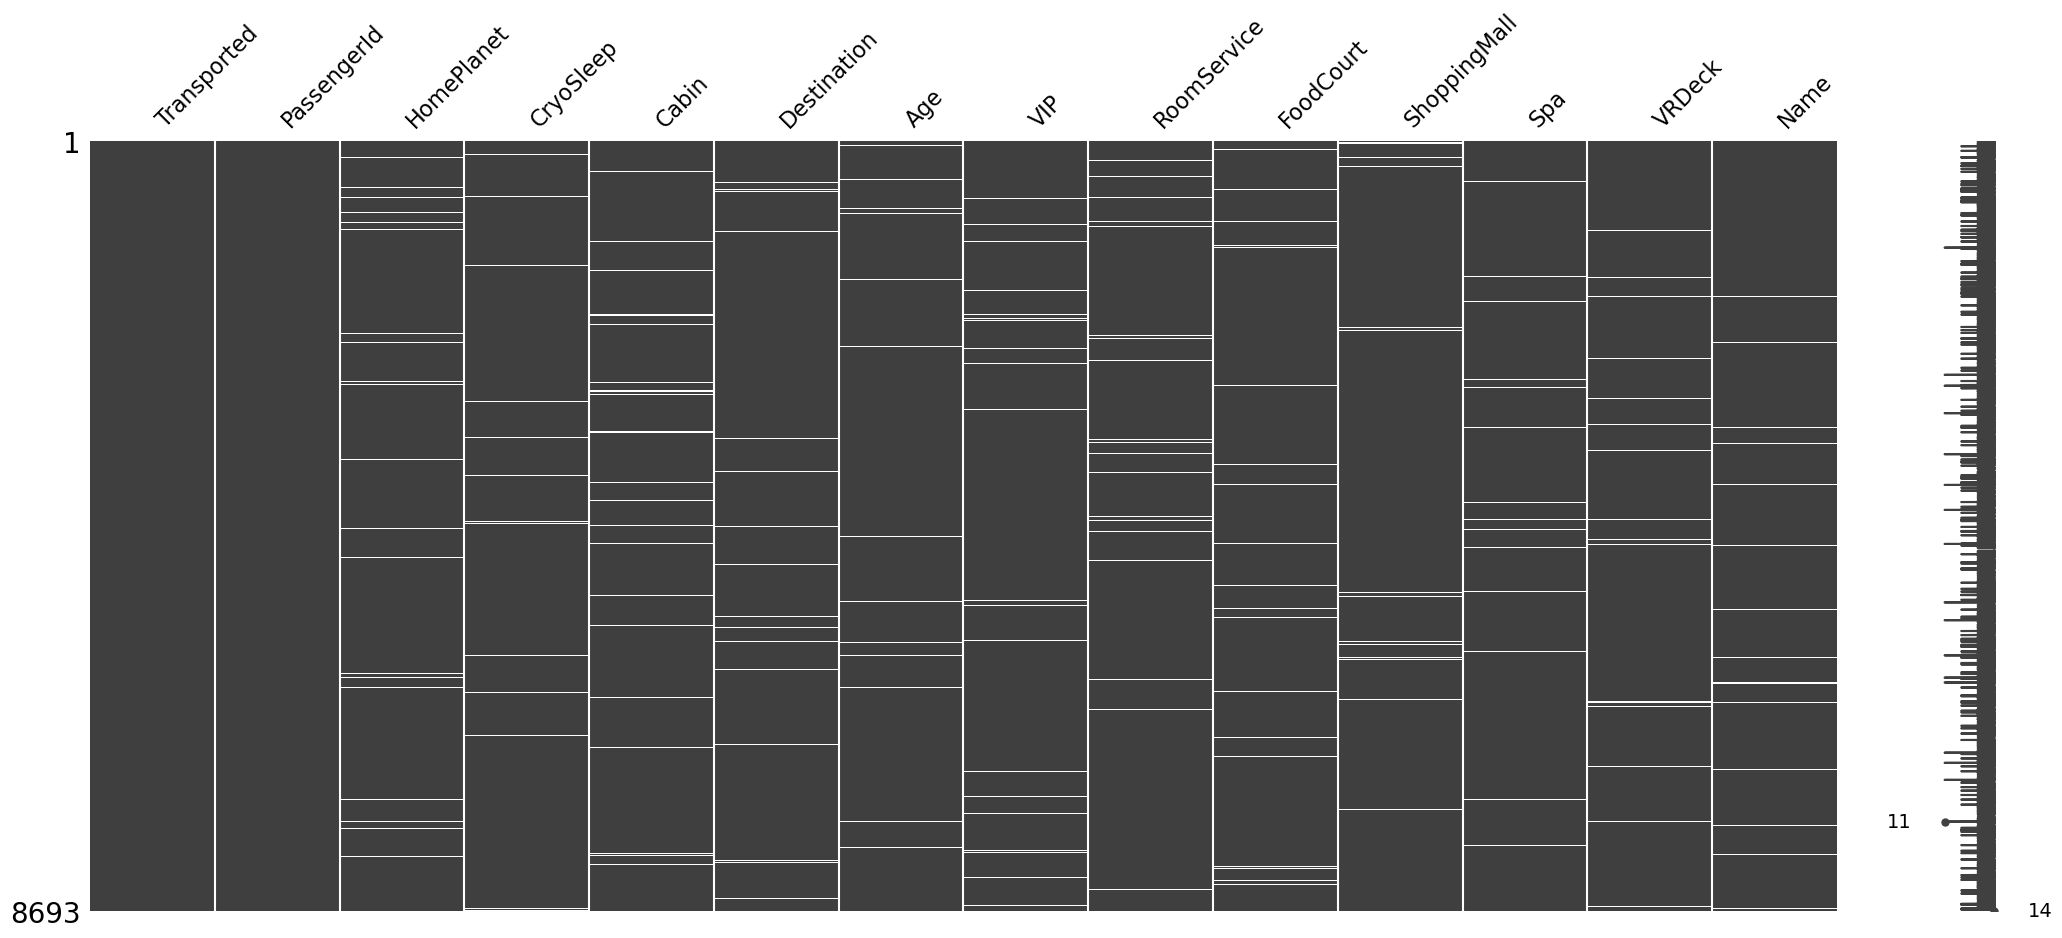

In [5]:
msno.matrix(train)

Observation
- missing data not in order
- high correlated: FoodCourt & VRDeck

Categorical
- HomePlanet: Earth, Europa, Mars
- Cabin: 3 components - cabinet level / number / P or S
- Destination: 3 in total

Numerical
- Age: not normal distribution
- RoomService: need transformation (highly right skew)
- FoodCourt: need transformation (highly right skew)
- ShoppingMall: need transformation (highly right skew)
- Spa: need transformation (highly right skew)
- VRDeck: need transformation (highly right skew)


Boolean
- CryoSleep
- VIP: imbalanced (most of False, but should be fine)

Preprocessing 
- extract number after "\_" in PassegerID columns as Family number
- Split Cabin columns into Cabin_deck, Cabin_num, Cabin_side
- 

In [6]:
for _ in [train, test]:
    _['Fam_num'] = _['PassengerId'].str.split('_',expand= True)[1]
    _['VIP'] = pd.to_numeric(_['VIP'])    
    _['Fam_num'] = _['Fam_num'].astype(int)
    _[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = _['Cabin'].str.split('/', expand = True)
    _['Cabin_num'] = pd.to_numeric(_['Cabin_num'])
    _ = _.set_index('PassengerId', inplace=True)
train['Transported']= train['Transported'].astype(float)

In [7]:
report= ProfileReport(train)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
print(train.info(), end='\n')
print('x'*20)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Transported   8693 non-null   float64
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   float64
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Fam_num       8693 non-null   int64  
 14  Cabin_deck    8494 non-null   object 
 15  Cabin_num     8494 non-null   float64
 16  Cabin_side    8494 non-null   object 
dtypes: float64(9), int64(1), object(7)
memory usage: 1.4+ MB
None
xxxxx

# EDA
Insights
- Nothing correlated to y


Fillna
- HomePlanet: set as a new type or most freq
- CryoSleep: using feature engineering
- Cabin: discard 
- Destination: least freq ('PSO J318.5-22') as both nan and this value fail to transport
- Age: median
- VIP: mode (0)   
- RoomService: median
- FoodCourt: median
- ShoppingMall: median
- Spa: median    
- VRDeck: median
- Name: discard     
- Fam_num: median
- Cabin_deck: most freq
- Cabin_num: median 
- Cabin_side: most freq

Text(0.5, 1.0, 'Correlation Heatmap')

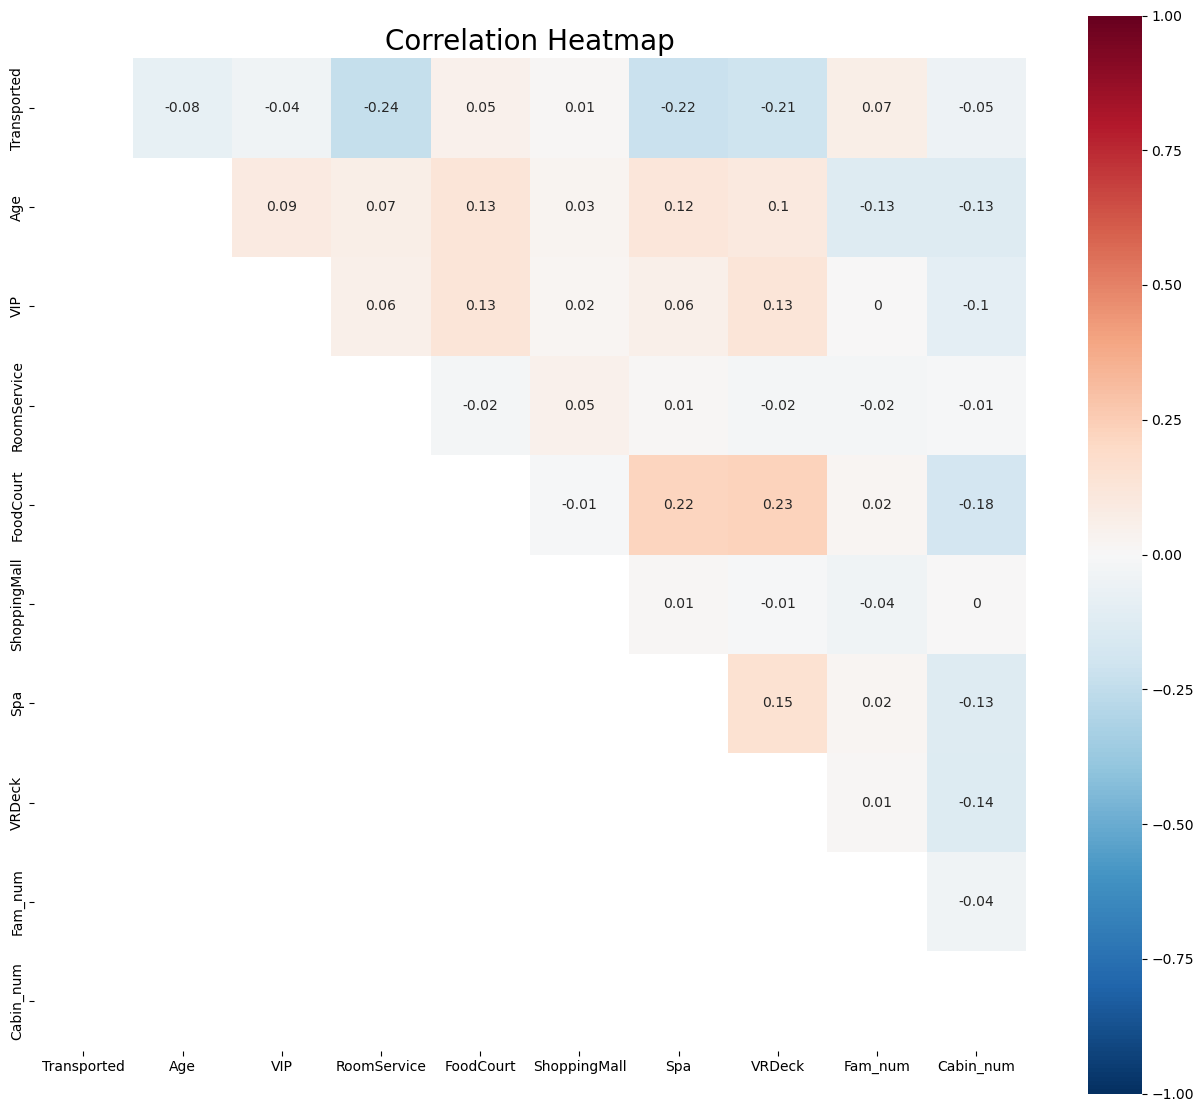

In [9]:
# heatmap with all the columns
plt.figure(figsize = (16,14))
matrix = np.triu(train.corr())
sns.heatmap(train.corr().round(2), square =True, annot=True, cmap='RdBu_r', mask=np.flip(matrix), vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize =20)

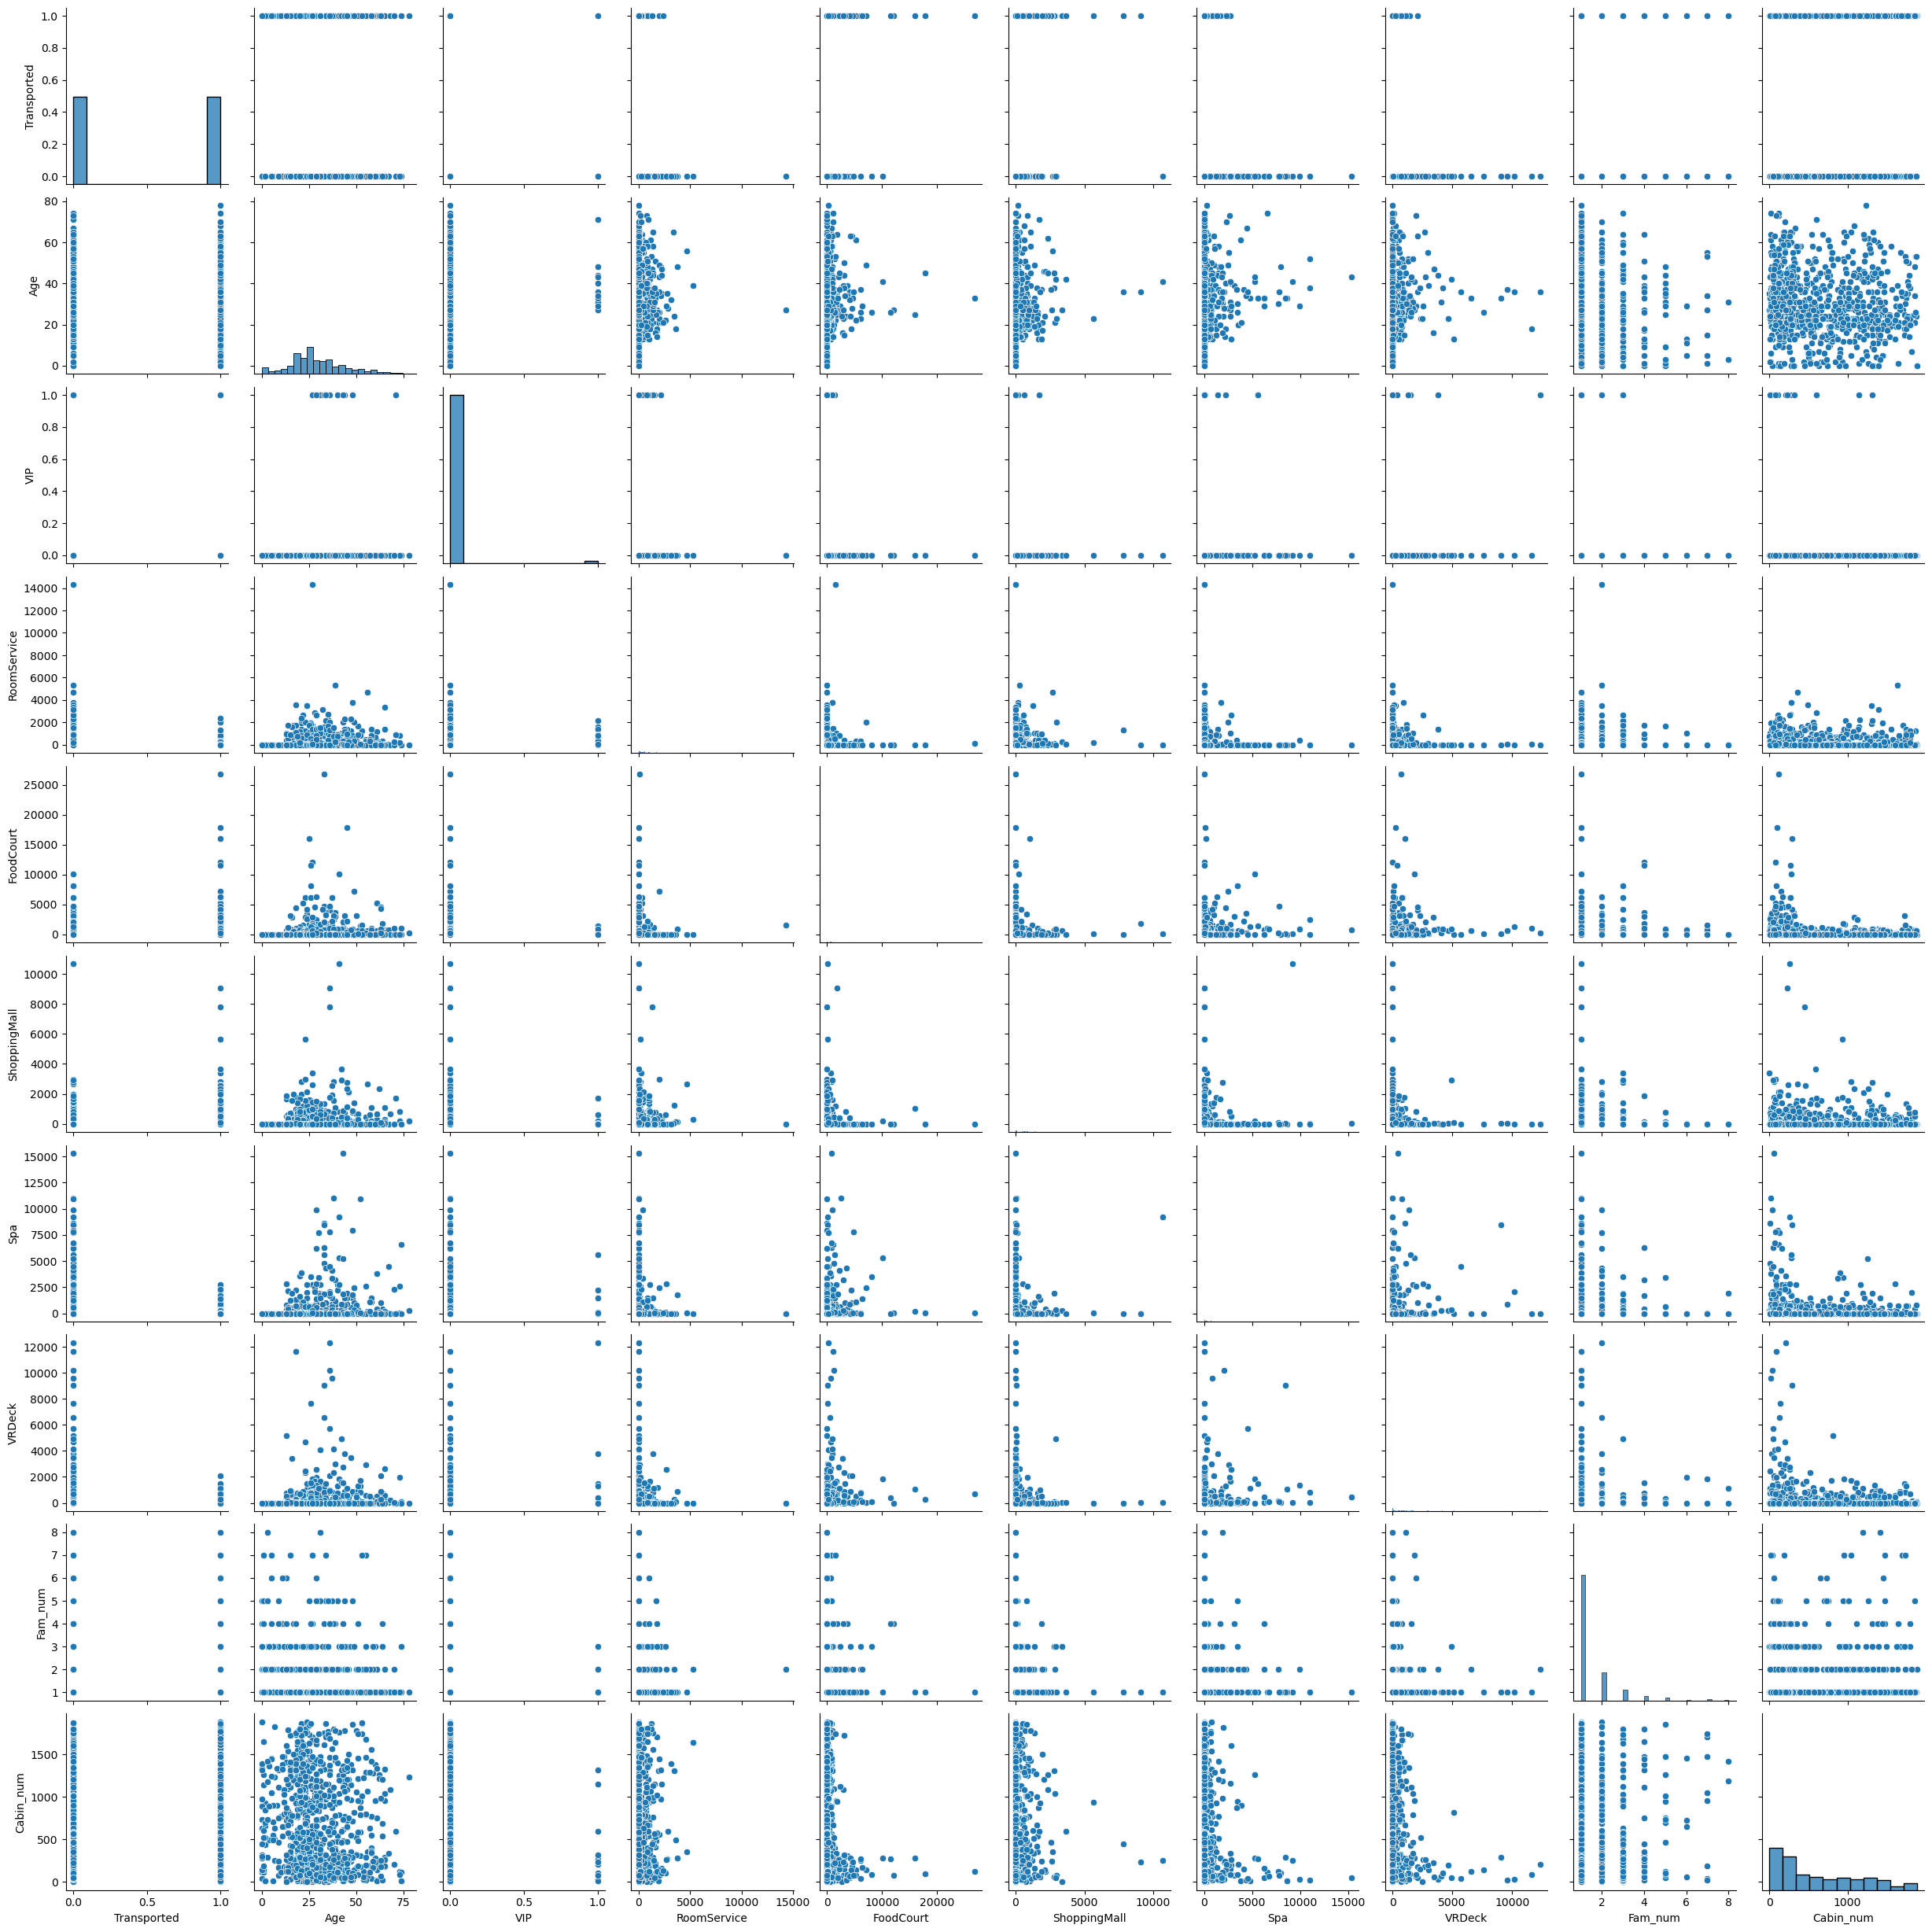

In [10]:
sns.pairplot(data= train._get_numeric_data().sample(1000)) 

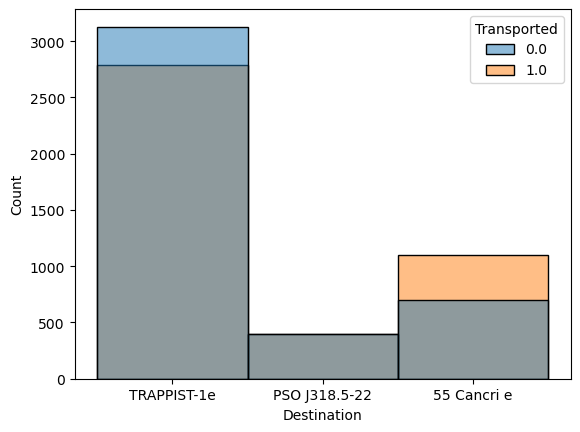

<AxesSubplot:xlabel='Destination', ylabel='Count'>

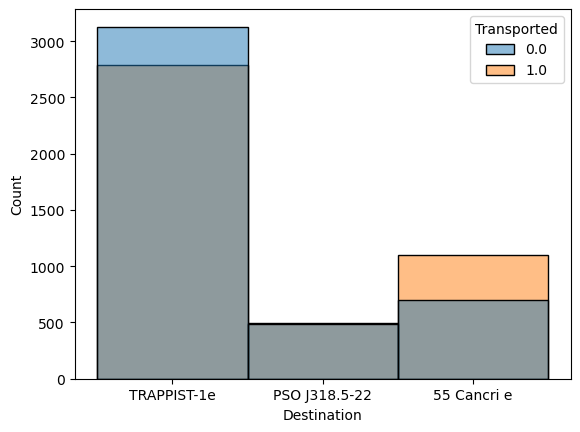

In [11]:
sns.histplot(data = train, x = 'Destination', hue='Transported')
plt.show()
sns.histplot(data = train.fillna(train['Destination'].value_counts().index[-1]), x = 'Destination', hue='Transported')

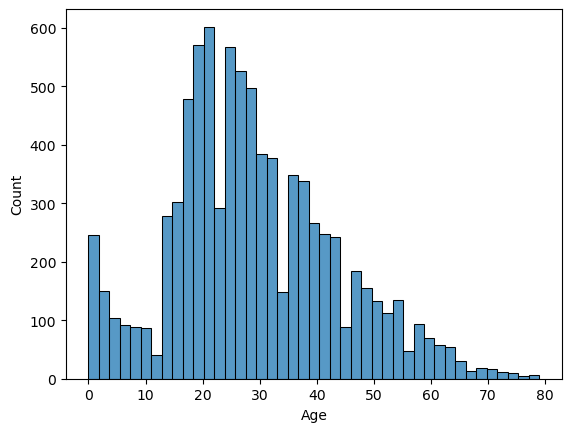

<AxesSubplot:xlabel='Age', ylabel='Count'>

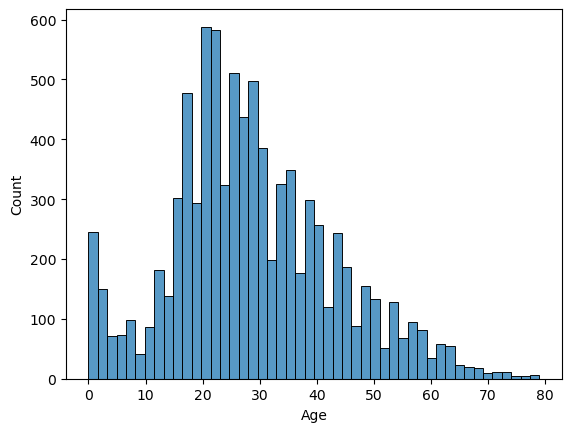

In [12]:
sns.histplot(data = train, x = 'Age')
plt.show()
sns.histplot(data = train['Age'].fillna(train['Age'].median()))

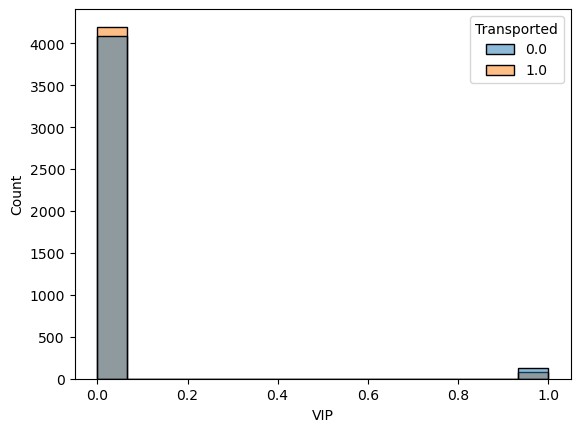

<AxesSubplot:xlabel='VIP', ylabel='Count'>

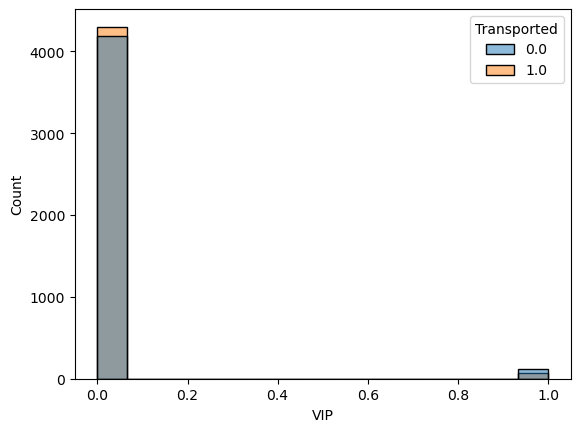

In [13]:
sns.histplot(data = train, x = 'VIP', hue='Transported')
plt.show()
sns.histplot(data = train.fillna(0), x = 'VIP', hue='Transported')

In [14]:
train[train['RoomService']==0].shape[0]/ train.shape[0]
# 0 account for 64% of data

0.6415506729552514

In [15]:
import plotly.express as px
# px.histogram(train[train['RoomService']!=0], x='RoomService')
px.histogram(train, x='RoomService')

In [16]:
px.histogram(train, x='FoodCourt')
# px.histogram(train[train['FoodCourt']!=0], x='FoodCourt')

In [17]:
px.histogram(train, x='ShoppingMall')

In [18]:
px.histogram(train, x='Spa') 

In [19]:
px.histogram(train, x='VRDeck') 

<AxesSubplot:xlabel='Fam_num'>

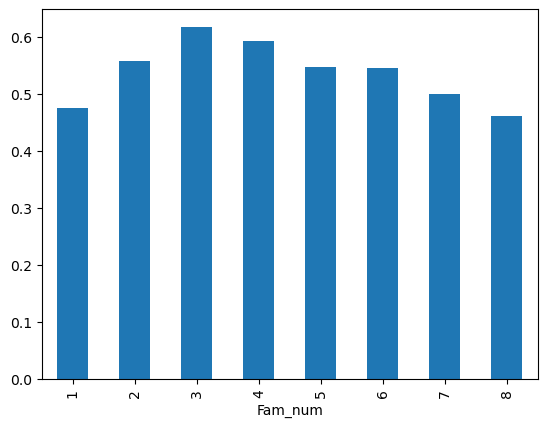

In [20]:
# Transported rate in terms of Fam_num
train.groupby('Fam_num')['Transported'].mean().plot.bar()

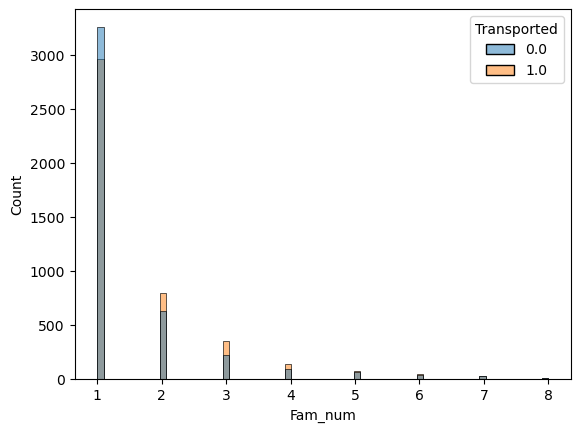

<AxesSubplot:xlabel='Fam_num', ylabel='Count'>

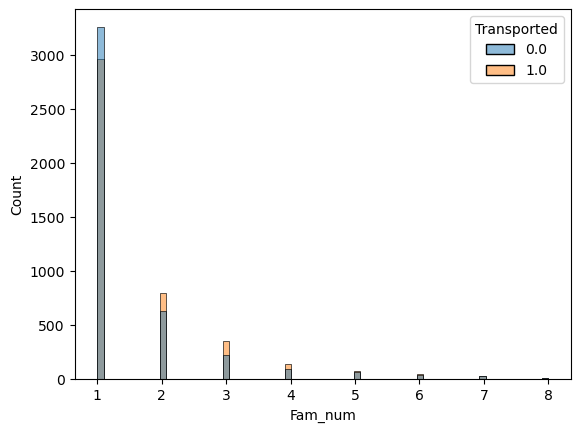

In [21]:
sns.histplot(data = train, x = 'Fam_num', hue='Transported')
plt.show()
sns.histplot(data = train.fillna(train['Fam_num'].median()), x = 'Fam_num', hue='Transported')
# px.histogram(train, x='Fam_num', color='Transported') 

In [22]:
train['Cabin_deck'].mode()

0    F
dtype: object

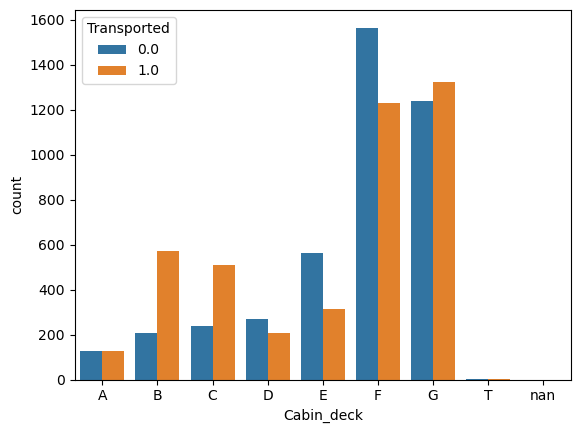

<AxesSubplot:xlabel='Cabin_deck', ylabel='count'>

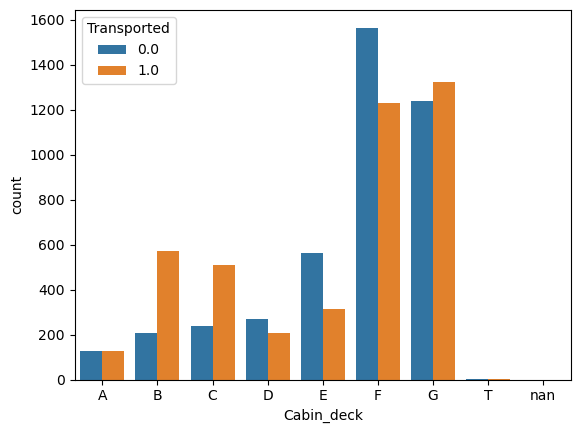

In [23]:
sns.countplot(data = train, x = 'Cabin_deck', hue='Transported', order= train['Cabin_deck'].sort_values().unique().tolist())
plt.show()
sns.countplot(data = train.fillna(train['Cabin_deck'].mode()), x = 'Cabin_deck', hue='Transported', order= train['Cabin_deck'].sort_values().unique().tolist())

In [24]:
train['Cabin_num'].median()

427.0

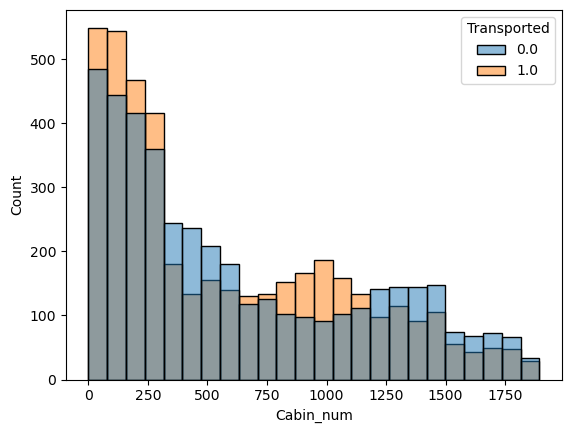

<AxesSubplot:xlabel='Cabin_num', ylabel='Count'>

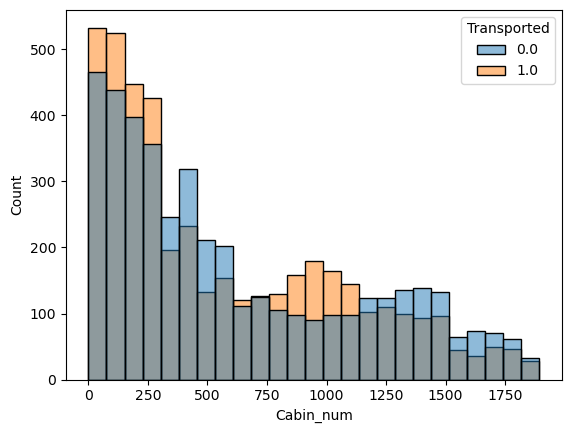

In [25]:
sns.histplot(data = train, x = 'Cabin_num', hue='Transported')
plt.show()
sns.histplot(data = train.fillna(train['Cabin_num'].median()), x = 'Cabin_num', hue='Transported')

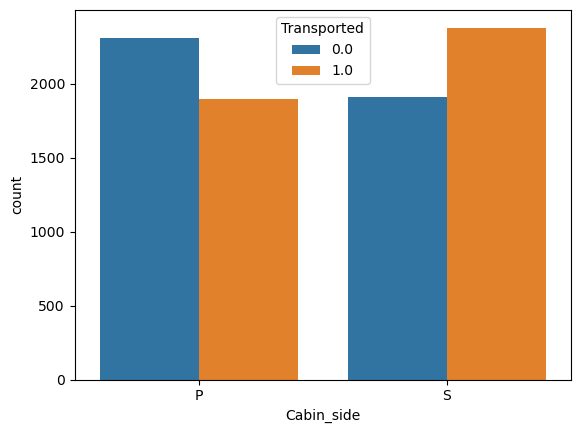

<AxesSubplot:xlabel='Cabin_side', ylabel='count'>

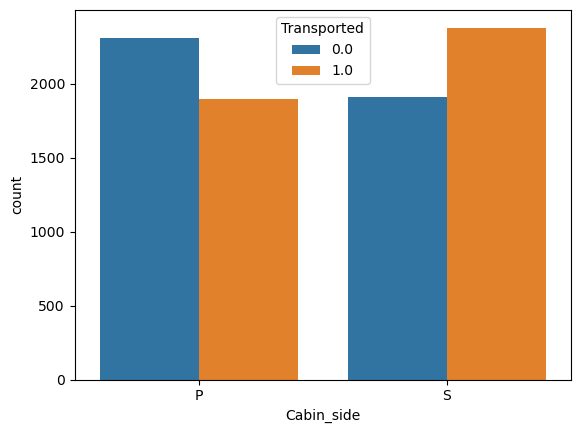

In [26]:
sns.countplot(data = train, x = 'Cabin_side', hue='Transported')
plt.show()
sns.countplot(data = train.fillna(train['Cabin_side'].mode()), x = 'Cabin_side', hue='Transported')

# Feature Engineering

In [27]:
#since the CryoSleep is a very important feature toward predicting Transported, we should use the stongest correlation features to determine 'CryoSleep'

for _ in [train, test]:
    # define new col as lux_exp to sum up the uneccessary spending
    _['Lux_exp'] = _['RoomService']+_['Spa']+_['VRDeck']
    # define new col as Total_exp to sum up the total spending
    _['Total_exp']= _['RoomService']+_['Spa']+_['VRDeck']+_['FoodCourt']+_['ShoppingMall']
    # split Total_exp to 2 categories in new col called: 'costly' 
    _['costly']=pd.qcut(_['Total_exp'], q=2, labels= ['costly_False', 'costly_True']).astype(object)
    # using the 'costly' to fill nan in CryoSleep col
    _['CryoSleep'] = _.CryoSleep.fillna(_.apply(lambda x : 0 if x.costly == 'costly_False' else (1 if pd.isna(x.CryoSleep) else x.CryoSleep), axis =1))

In [28]:
# actually no need transformation because CART is robust enough
# train['RoomService_if0'] = train['RoomService'].apply(lambda x: 1 if x == 0 else 0)
# train['FoodCourt_if0'] = train['FoodCourt'].apply(lambda x: 1 if x == 0 else 0)

In [29]:
print(train.isna().sum()/train.shape[0], end='\n')
print('x'*20)
print(test.isna().sum()/test.shape[0])

Transported     0.000000
HomePlanet      0.023122
CryoSleep       0.000000
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Fam_num         0.000000
Cabin_deck      0.022892
Cabin_num       0.022892
Cabin_side      0.022892
Lux_exp         0.062579
Total_exp       0.104452
costly          0.104452
dtype: float64
xxxxxxxxxxxxxxxxxxxx
HomePlanet      0.020341
CryoSleep       0.000000
Cabin           0.023381
Destination     0.021510
Age             0.021277
VIP             0.021744
RoomService     0.019172
FoodCourt       0.024784
ShoppingMall    0.022913
Spa             0.023615
VRDeck          0.018705
Name            0.021978
Fam_num         0.000000
Cabin_deck      0.023381
Cabin_num       0.023381
Cabin_side      0.023381
Lux_exp         0.060556
Total_exp       0.106383
costly        

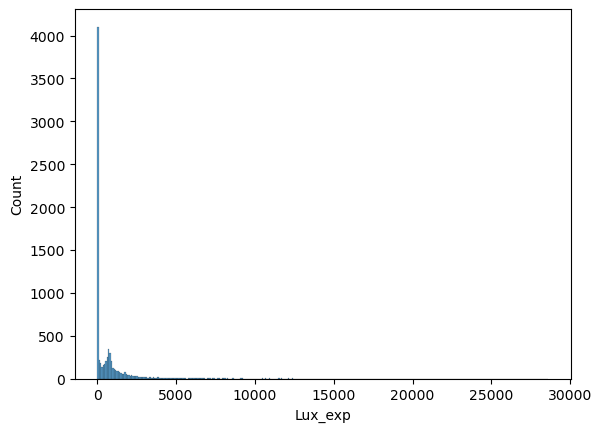

<AxesSubplot:xlabel='Lux_exp', ylabel='Count'>

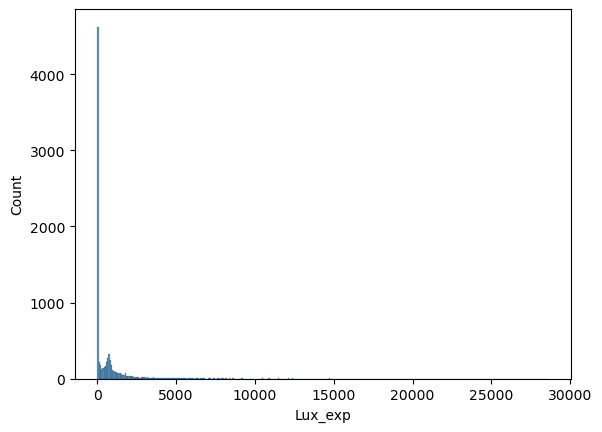

In [30]:
sns.histplot(data = train, x = 'Lux_exp')
plt.show()
sns.histplot(data = train.fillna(train['Lux_exp'].median()), x = 'Lux_exp')

Fillna
- HomePlanet: set as a new type or most freq
- CryoSleep: using feature engineering
- Cabin: discard 
- Destination: least freq ('PSO J318.5-22') as both nan and this value fail to transport
- Age: median
- VIP: mode (0)   
- RoomService: median
- FoodCourt: median
- ShoppingMall: median
- Spa: median    
- VRDeck: median
- Name: discard     
- Fam_num: median
- Cabin_deck: most freq
- Cabin_num: median 
- Cabin_side: most freq

New 
- Lux_exp: median       
- Total_exp: median
- costly: most freq

# ML

### check if CryoSleep really important?

In [31]:
drop_features = ['Cabin','Name']
numerical_features = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Fam_num','Cabin_num','Lux_exp','Total_exp']
categorical_features_most_freq = ['HomePlanet', 'Cabin_deck', 'Cabin_side','costly']
categorical_features_least_freq = ['Destination']
binary_features = ['CryoSleep','VIP'] # impute with mode

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
import graphviz
import xgboost as xgb
import lightgbm
import catboost
from sklearn.metrics import mean_squared_error
import warnings
seed = 123
warnings.filterwarnings('ignore')

train_X = train.drop(columns=['Transported'])
train_y = train['Transported']
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.15, random_state= seed)
# 15% test set, 85% train set (roughly 10%), 80.1% traning set

logit = LogisticRegressionCV()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
baggingC = BaggingClassifier()
gbc = GradientBoostingClassifier()
xgbc = xgb.XGBClassifier()
lgbmc = lightgbm.LGBMClassifier()
catc = catboost.CatBoostClassifier(verbose=100)

numeric_transformer = make_pipeline(
        SimpleImputer(strategy="median"), 
        StandardScaler()
    )
# PowerTransformer(method='box-cox')
log_transformer = make_pipeline(
    SimpleImputer(strategy="median"), 
    FunctionTransformer(lambda x: x+1, validate=False),
    FunctionTransformer(np.log, validate=True),
)
categorical_transformer_most_freq = make_pipeline(
    SimpleImputer(strategy="most_frequent", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)

categorical_transformer_least_freq = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="PSO J318.5-22"),
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)

binary_transformer = make_pipeline(
    FunctionTransformer(lambda x: x.fillna(0).astype(int), validate=False), # check how to deal with nan value later
    SimpleImputer(strategy="constant"),
    OneHotEncoder(drop="if_binary", dtype=int),
)

preprocessor = make_column_transformer(
    ('drop', drop_features),
#     (log_transformer, log_needed_numeric),
    (numeric_transformer, numerical_features),
    (categorical_transformer_most_freq, categorical_features_most_freq),
    (categorical_transformer_least_freq, categorical_features_least_freq),
    (binary_transformer, binary_features)
)

models = [logit, dt, rf, baggingC, gbc, xgbc, lgbmc, catc]
test_scores = []
training_scores = []
for model in models:
    model = make_pipeline(preprocessor, model)
    model.fit(X_train, y_train)
    test_scores.append(model.score(X_test, y_test))
    training_scores.append(model.score(X_train, y_train))
pd.DataFrame({'model':models, 'val_score':test_scores, 'training scores': training_scores}).round(4)

Learning rate set to 0.0242
0:	learn: 0.6818494	total: 4.74ms	remaining: 4.73s
100:	learn: 0.4131618	total: 464ms	remaining: 4.13s
200:	learn: 0.3799756	total: 923ms	remaining: 3.67s
300:	learn: 0.3602982	total: 1.39s	remaining: 3.23s
400:	learn: 0.3443029	total: 1.84s	remaining: 2.74s
500:	learn: 0.3295925	total: 2.3s	remaining: 2.29s
600:	learn: 0.3160024	total: 2.77s	remaining: 1.84s
700:	learn: 0.3039101	total: 3.23s	remaining: 1.38s
800:	learn: 0.2935528	total: 3.69s	remaining: 917ms
900:	learn: 0.2838312	total: 4.14s	remaining: 455ms
999:	learn: 0.2750901	total: 4.6s	remaining: 0us


model  val_score  \
0                             LogisticRegressionCV()     0.8044   
1                           DecisionTreeClassifier()     0.7845   
2  (DecisionTreeClassifier(max_features='auto', r...     0.8175   
3  (DecisionTreeClassifier(random_state=155666229...     0.8183   
4  ([DecisionTreeRegressor(criterion='friedman_ms...     0.8221   
5  XGBClassifier(base_score=0.5, booster='gbtree'...     0.8252   
6                                   LGBMClassifier()     0.8321   
7  <catboost.core.CatBoostClassifier object at 0x...     0.8336   

   training scores  
0           0.7896  
1           0.9997  
2           0.9996  
3           0.9836  
4           0.8215  
5           0.9367  
6           0.8896  
7           0.8859

In [77]:
# vote from xgb, lgbm, cat
from sklearn.ensemble import VotingClassifier
# Initialize classifiers
xgbc = xgb.XGBClassifier()
lgbmc = lightgbm.LGBMClassifier()
catc = catboost.CatBoostClassifier(verbose=100)

# Define the voting classifier
voting_clf = VotingClassifier(
    estimators=[('lgbm', lgbmc), ('cat', catc)],
    voting='soft' # Use soft voting to combine probabilities
)

voting_clf = make_pipeline(preprocessor, voting_clf)

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Evaluate the voting classifier
test_scores.append(voting_clf.score(X_test, y_test))
training_scores.append(voting_clf.score(X_train, y_train))
pd.DataFrame({'model':models + ['Voting'], 'val_score':test_scores, 'training scores': training_scores}).round(6)

Learning rate set to 0.0242
0:	learn: 0.6818494	total: 4.97ms	remaining: 4.97s
100:	learn: 0.4131618	total: 465ms	remaining: 4.14s
200:	learn: 0.3799756	total: 938ms	remaining: 3.73s
300:	learn: 0.3602982	total: 1.41s	remaining: 3.27s
400:	learn: 0.3443029	total: 1.88s	remaining: 2.81s
500:	learn: 0.3295925	total: 2.35s	remaining: 2.34s
600:	learn: 0.3160024	total: 2.82s	remaining: 1.87s
700:	learn: 0.3039101	total: 3.29s	remaining: 1.4s
800:	learn: 0.2935528	total: 3.76s	remaining: 934ms
900:	learn: 0.2838312	total: 4.26s	remaining: 468ms
999:	learn: 0.2750901	total: 4.8s	remaining: 0us


model  val_score  \
0                             LogisticRegressionCV()     0.8044   
1                           DecisionTreeClassifier()     0.7845   
2  (DecisionTreeClassifier(max_features='auto', r...     0.8175   
3  (DecisionTreeClassifier(random_state=155666229...     0.8183   
4  ([DecisionTreeRegressor(criterion='friedman_ms...     0.8221   
5  XGBClassifier(base_score=0.5, booster='gbtree'...     0.8252   
6                                   LGBMClassifier()     0.8321   
7  <catboost.core.CatBoostClassifier object at 0x...     0.8336   
8                                             Voting     0.8321   

   training scores  
0           0.7896  
1           0.9997  
2           0.9996  
3           0.9836  
4           0.8215  
5           0.9367  
6           0.8896  
7           0.8859  
8           0.8901

In [78]:
pd.DataFrame({'model':models + ['Voting'], 'val_score':test_scores, 'training scores': training_scores}).round(6)

model  val_score  \
0                             LogisticRegressionCV()   0.804448   
1                           DecisionTreeClassifier()   0.784509   
2  (DecisionTreeClassifier(max_features='auto', r...   0.817485   
3  (DecisionTreeClassifier(random_state=155666229...   0.818252   
4  ([DecisionTreeRegressor(criterion='friedman_ms...   0.822086   
5  XGBClassifier(base_score=0.5, booster='gbtree'...   0.825153   
6                                   LGBMClassifier()   0.832055   
7  <catboost.core.CatBoostClassifier object at 0x...   0.833589   
8                                             Voting   0.832055   

   training scores  
0         0.789552  
1         0.999729  
2         0.999594  
3         0.983624  
4         0.821491  
5         0.936663  
6         0.889566  
7         0.885911  
8         0.890107

In [81]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
xgbc = xgb.XGBClassifier()

# Hyperparameters to test for RandomForestClassifier
rf_param_dist = {
    'n_estimators': [50, 100, 200],
                 'max_features': ['auto', 'sqrt', 'log2', None],
                 'max_depth': [10, 20, 30, None],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Hyperparameters to test for XGBClassifier
xgbc_param_dist = {'n_estimators': [50, 100, 200],
                   'learning_rate': [0.05, 0.1, 0.2],
                   'max_depth': [3, 4, 5, 6],
                   'subsample': [0.6, 0.8, 1.0],
                   'colsample_bytree': [0.6, 0.8, 1.0],
                   'gamma': [0, 1, 5]
                  }

# GridSearchCV for RandomForestClassifier
rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=rf_param_dist, 
                               n_iter=100, 
                               cv=5, 
#                                verbose=2, 
                               random_state=seed, 
                               n_jobs=-1)

# GridSearchCV for XGBClassifier
xgbc_random = RandomizedSearchCV(estimator=xgbc, 
                                 param_distributions=xgbc_param_dist, 
                                 n_iter=100, 
                                 cv=5, 
#                                  verbose=2, 
                                 random_state=seed, 
                                 n_jobs=-1)

numeric_transformer = make_pipeline(
        SimpleImputer(strategy="median"), 
        StandardScaler()
    )
# PowerTransformer(method='box-cox')
# log_transformer = make_pipeline(
#     FunctionTransformer(np.log, validate=True),
# )
categorical_transformer_most_freq = make_pipeline(
    SimpleImputer(strategy="most_frequent", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)

categorical_transformer_least_freq = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="PSO J318.5-22"),
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)

binary_transformer = make_pipeline(
    FunctionTransformer(lambda x: x.fillna(0).astype(int), validate=False), # check how to deal with nan value later
    SimpleImputer(strategy="constant"),
    OneHotEncoder(drop="if_binary", dtype=int),
)

preprocessor = make_column_transformer(
    ('drop', drop_features),
#     (log_transformer, log_needed_numeric),
    (numeric_transformer, numerical_features),
    (categorical_transformer_most_freq, categorical_features_most_freq),
    (categorical_transformer_least_freq, categorical_features_least_freq),
    (binary_transformer, binary_features)
)

rf_random = make_pipeline(preprocessor, rf_random)
rf_random.fit(X_train, y_train)

xgbc_random = make_pipeline(preprocessor, xgbc_random)
xgbc_random.fit(X_train, y_train)

models = [
    (rf_random, 'RandomForestClassifier'), 
    (xgbc_random, 'XGBClassifier')]
test_scores = []
training_scores = []
for model, name in models:
    test_scores.append(model.score(X_test, y_test))
    training_scores.append(model.score(X_train, y_train))
# for model, name in models:
#     full_pipeline = make_pipeline(preprocessor, model)
#     full_pipeline.fit(X_train, y_train)
#     test_scores.append(full_pipeline.score(X_test, y_test))
#     training_scores.append(full_pipeline.score(X_train, y_train))
#     print(f'{name}: best_params={model.best_params_}, validation_score={test_scores[-1]:.2f}')
pd.DataFrame({'model':models, 'test_score':test_scores, 'training scores': training_scores})

model  test_score  \
0  ((ColumnTransformer(transformers=[('drop', 'dr...    0.827454   
1  ((ColumnTransformer(transformers=[('drop', 'dr...    0.828221   

   training scores  
0         0.877521  
1         0.849235

In [35]:
from sklearn.model_selection import RandomizedSearchCV

lgbmc = lightgbm.LGBMClassifier()
catc = catboost.CatBoostClassifier(verbose=False)

# Hyperparameters to test for LGBMClassifier
lgbmc_param_grid = {
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'reg_alpha': [0, 1, 3],
    'reg_lambda': [0, 1, 3]
}

# Hyperparameters to test for CatBoostClassifier
catc_param_grid = {
    'iterations': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.5], # better if not tune learning_rate
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5]
}

# GridSearchCV for LGBMClassifier
lgbmc_random = RandomizedSearchCV(estimator=lgbmc, 
                               param_distributions=lgbmc_param_grid, 
                               n_iter=100, 
                               cv=5, 
#                                verbose=2, 
                               random_state=seed, 
                               n_jobs=-1)

# GridSearchCV for CatBoostClassifier
catc_random = RandomizedSearchCV(estimator=catc, 
                                 param_distributions=catc_param_grid, 
                                 n_iter=100, 
                                 cv=5, 
#                                  verbose=2, 
                                 random_state=seed, 
                                 n_jobs=-1)

numeric_transformer = make_pipeline(
        SimpleImputer(strategy="median"), 
        StandardScaler()
    )
categorical_transformer_most_freq = make_pipeline(
    SimpleImputer(strategy="most_frequent", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)

categorical_transformer_least_freq = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="PSO J318.5-22"),
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)

binary_transformer = make_pipeline(
    FunctionTransformer(lambda x: x.fillna(0).astype(int), validate=False), # check how to deal with nan value later
    SimpleImputer(strategy="constant"),
    OneHotEncoder(drop="if_binary", dtype=int),
)

preprocessor = make_column_transformer(
    ('drop', drop_features),
#     (log_transformer, log_needed_numeric),
    (numeric_transformer, numerical_features),
    (categorical_transformer_most_freq, categorical_features_most_freq),
    (categorical_transformer_least_freq, categorical_features_least_freq),
    (binary_transformer, binary_features)
)

lgbmc_random = make_pipeline(preprocessor, lgbmc_random)
lgbmc_random.fit(X_train, y_train)

catc_random = make_pipeline(preprocessor, catc_random)
catc_random.fit(X_train, y_train)

models = [
    (lgbmc_random, 'LGBMClassifier'), 
    (catc_random, 'CatBoostClassifier')]
test_scores = []
training_scores = []
for model, name in models:
    test_scores.append(model.score(X_test, y_test))
    training_scores.append(model.score(X_train, y_train))
pd.DataFrame({'model':models, 'test_score':test_scores, 'training scores': training_scores})

model  test_score  \
0  ((ColumnTransformer(transformers=[('drop', 'dr...    0.833589   
1  ((ColumnTransformer(transformers=[('drop', 'dr...    0.830521   

   training scores  
0         0.860739  
1         0.876979

In [46]:
# rf_random.named_steps['randomizedsearchcv'].best_params_
# xgbc_random.named_steps['randomizedsearchcv'].best_params_
lgbmc_random.named_steps['randomizedsearchcv'].best_params_
# catc_random.named_steps['randomizedsearchcv'].best_params_

{'reg_lambda': 0,
 'reg_alpha': 0,
 'num_leaves': 31,
 'max_depth': 5,
 'learning_rate': 0.1}

In [47]:
preprocessor.named_transformers_

{'drop': 'drop',
 'pipeline-1': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))]),
 'pipeline-2': Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='missing', strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse=False))]),
 'pipeline-3': Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='PSO J318.5-22',
                                strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse=False))]),
 'pipeline-4': Pipeline(steps=[('functiontransformer',
                  FunctionTransformer(func=<function <lambda> at 0x7081128b7680>)),
                 ('simpleimputer', SimpleImputer(strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(drop='if_binary', dtype=<class 'int'>))])}

In [104]:
# feature importances for random forest
importances = rf_random.named_steps['randomizedsearchcv'].best_estimator_.feature_importances_
feature_names = preprocessor.named_transformers_['pipeline-2']['onehotencoder'].get_feature_names(categorical_features).tolist() \
+preprocessor.named_transformers_['pipeline-3']['onehotencoder'].get_feature_names(categorical_features_least_freq).tolist()\
                + numerical_features + binary_features
feature_importances = pd.DataFrame({'feature': feature_names,
                                    'importance': importances}).sort_values('importance', ascending=False)
feature_importances

feature  importance
8               Destination_F    0.191157
9               Destination_G    0.097184
28                  CryoSleep    0.074341
4               Destination_B    0.073081
7               Destination_E    0.066544
1           HomePlanet_Europa    0.063981
5               Destination_C    0.061397
2             HomePlanet_Mars    0.057158
0            HomePlanet_Earth    0.048523
3               Destination_A    0.041491
23                     VRDeck    0.030785
10              Destination_T    0.030177
24                    Fam_num    0.027498
11               Cabin_deck_P    0.020196
17    Destination_TRAPPIST-1e    0.015748
19                RoomService    0.013253
18                        Age    0.012972
21               ShoppingMall    0.011568
6               Destination_D    0.010961
22                        Spa    0.010887
12               Cabin_deck_S    0.007766
27                  Total_exp    0.007431
15    Destination_55 Cancri e    0.007030
25                  Cabin_num    0.006705
14     Cabin_side_costly_True    0.005875
26                    Lux_exp    0.003084
16  Destination_PSO J318.5-22    0.001617
13    Cabin_side_costly_False    0.001059
29                        VIP    0.000532
20                  FoodCourt    0.000000

In [96]:
# feature importances for xgboost
importances = xgbc_random.named_steps['randomizedsearchcv'].best_estimator_.feature_importances_
feature_names = preprocessor.named_transformers_['pipeline-2']['onehotencoder'].get_feature_names(categorical_features).tolist() \
+preprocessor.named_transformers_['pipeline-3']['onehotencoder'].get_feature_names(categorical_features_least_freq).tolist()\
                + numerical_features + binary_features
feature_importances = pd.DataFrame({'feature': feature_names,
                                    'importance': importances}).sort_values('importance', ascending=False)
feature_importances


feature  importance
28                  CryoSleep    0.229851
11               Cabin_deck_P    0.084236
10              Destination_T    0.079576
8               Destination_F    0.077842
9               Destination_G    0.064604
23                     VRDeck    0.048546
17    Destination_TRAPPIST-1e    0.037386
19                RoomService    0.031799
12               Cabin_deck_S    0.026943
21               ShoppingMall    0.026860
3               Destination_A    0.025648
1           HomePlanet_Europa    0.024524
18                        Age    0.022170
2             HomePlanet_Mars    0.021547
22                        Spa    0.020624
25                  Cabin_num    0.019709
24                    Fam_num    0.018562
7               Destination_E    0.017258
15    Destination_55 Cancri e    0.015491
5               Destination_C    0.015219
4               Destination_B    0.014030
0            HomePlanet_Earth    0.013963
29                        VIP    0.012480
27                  Total_exp    0.012477
26                    Lux_exp    0.010062
13    Cabin_side_costly_False    0.009858
14     Cabin_side_costly_True    0.007631
6               Destination_D    0.006961
16  Destination_PSO J318.5-22    0.004141
20                  FoodCourt    0.000000

# Predict

In [79]:
# final_model = make_pipeline(preprocessor, rf)
print(f'Test Score:{voting_clf.score(X_test, y_test)}')
# test

Test Score:0.8320552147239264


In [60]:
test = test.reset_index()

In [81]:
y_pred = voting_clf.predict(test)
test['Transported'] = y_pred
test['Transported'] = test['Transported'].astype(bool)
submit = test[['PassengerId','Transported']]
submit

PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]

In [82]:
submit.to_csv('submission_vote_0415.csv', index=False)